# All Drivers - analysis of tripMD outputs

## 1. Imports and data loading

In [1]:
freq_per_second = 5
output_name="all_drivers"

lat_index=0
lon_index=1

In [2]:
import os
import sys
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FILE_DIR = os.getcwd()
ROOT_DIR = os.path.abspath(os.path.join(FILE_DIR, os.pardir))
sys.path.insert(0, os.path.join(ROOT_DIR, "src"))

from tripMD.cluster import plot_dtwsom_bmus
from utils import uah_eval, uah_viz

In [3]:
output_folder = os.path.join(ROOT_DIR, "outputs", output_name)

trip_list = pickle.load(open(os.path.join(output_folder, "trip_list.p"), "rb"))
motif_list = pickle.load(open(os.path.join(output_folder, "motifs.p"), "rb"))
pruned_motif_list = pickle.load(open(os.path.join(output_folder, "pruned_motifs.p"), "rb"))
dtwsom_model = pickle.load(open(os.path.join(output_folder, "dtwsom_model.p"), "rb"))
cluster_dict_list = pickle.load(open(os.path.join(output_folder, "dtwsom_clusters.p"), "rb"))
clusters_sum = pickle.load(open(os.path.join(output_folder, "clusters_summary.p"), "rb"))

motif_center_list = [motif.get_center_obs(trip_list) for motif in motif_list]

## 2. DTW-SOM plots

<img src="../../outputs/all_drivers/umatrix_plot.png" alt="drawing" width="400"/><img src="../../outputs/all_drivers/winner_plot.png" alt="drawing" width="400"/>

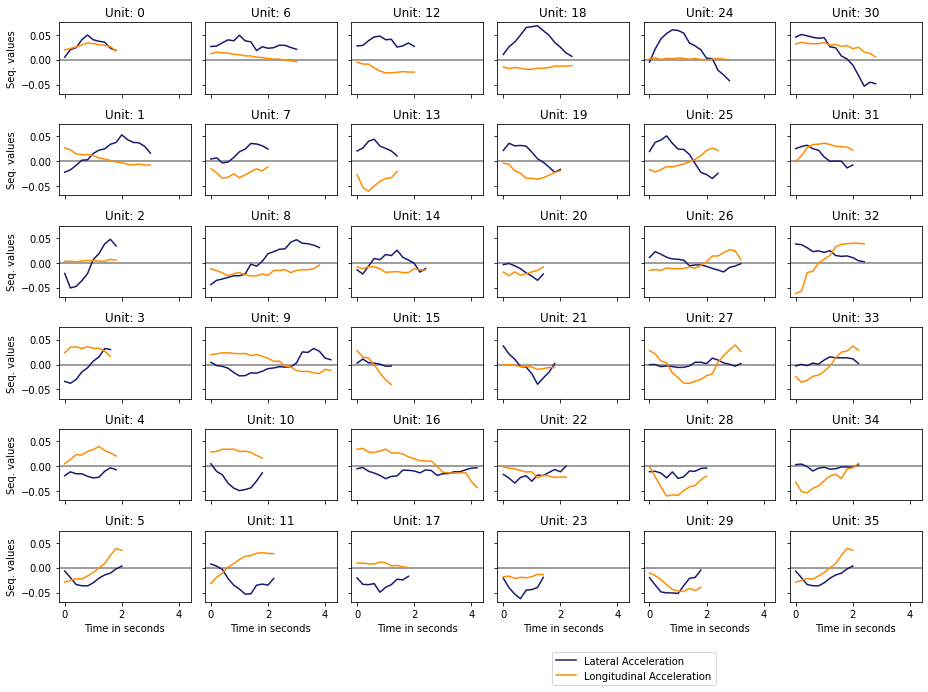

In [4]:
fig = plot_dtwsom_bmus(dtwsom_model, lat_index, lon_index, freq_per_second, figsize=(13,9))
plt.show()

## 3. Cluster analysis

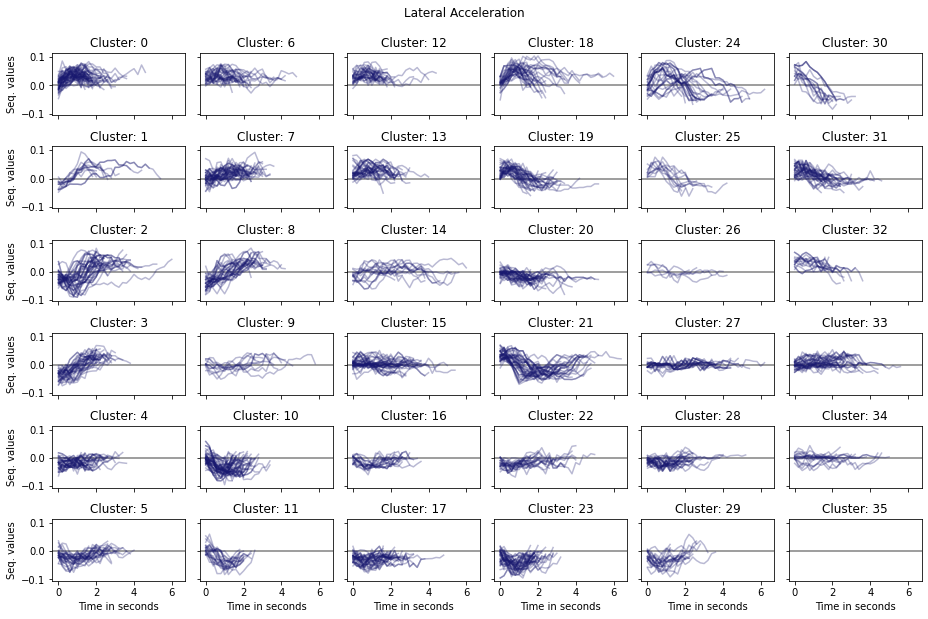

In [5]:
fig = uah_viz.plot_clusters_acceleration(dtwsom_model, motif_center_list, freq_per_second, lat_index, 
                                         figsize=(13,9), color="midnightblue", suptitle="Lateral Acceleration")
plt.show()

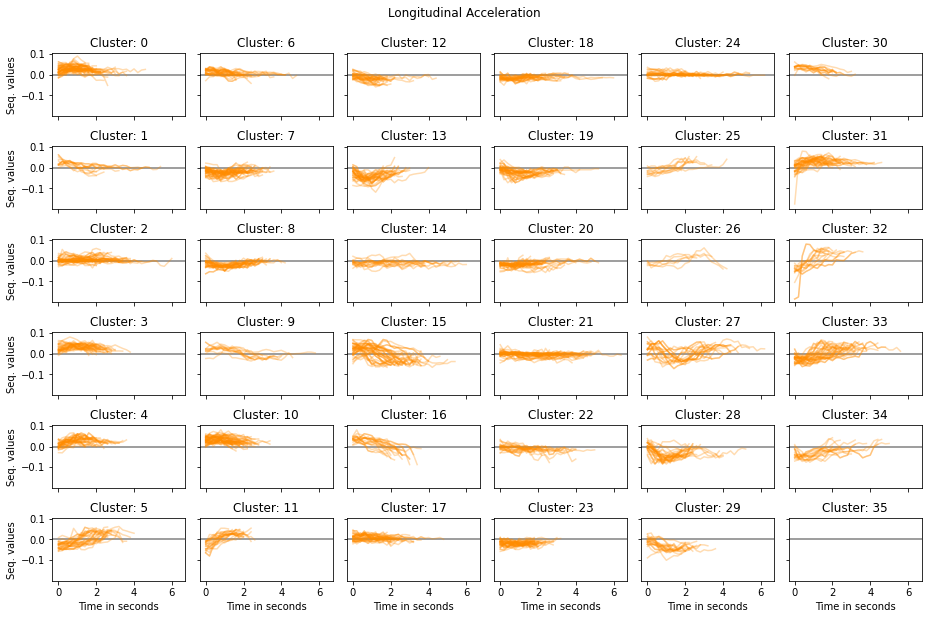

In [6]:
fig = uah_viz.plot_clusters_acceleration(dtwsom_model, motif_center_list, freq_per_second, lon_index, 
                                         figsize=(13,9), color="darkorange", suptitle="Longitudinal Acceleration")
plt.show()

In [7]:
pd.DataFrame(clusters_sum)

,n_members,lat_maneuvers,lon_maneuvers
0,55,"[(high_pos_turn, 0.491), (pos_turn, 0.455), (p...","[(strong_accel, 0.455), (accel, 0.418), (accel..."
1,13,"[(high_pos_turn, 0.462), (pos_turn, 0.385), (n...","[(accel, 0.615), (accel-brake, 0.154), (brake,..."
2,42,"[(high_neg_turn, 0.19), (high_neg_turn-pos_tur...","[(no_man, 0.524), (accel, 0.405), (brake, 0.04..."
3,35,"[(high_neg_turn, 0.257), (neg_turn, 0.229), (n...","[(strong_accel, 0.686), (accel, 0.314)]"
4,37,"[(neg_turn, 0.649), (neg_turn-neg_turn, 0.189)...","[(strong_accel, 0.568), (accel, 0.324), (accel..."
5,29,"[(neg_turn, 0.759), (high_neg_turn, 0.241)]","[(brake-accel, 0.31), (accel, 0.241), (brake, ..."
6,31,"[(high_pos_turn, 0.484), (pos_turn-pos_turn, 0...","[(accel, 0.548), (no_man, 0.387), (accel-brake..."
7,43,"[(pos_turn, 0.605), (high_pos_turn, 0.14), (no...","[(brake, 0.395), (strong_brake, 0.395), (brake..."
8,33,"[(neg_turn-pos_turn, 0.303), (pos_turn, 0.212)...","[(brake, 0.848), (strong_brake, 0.152)]"
9,11,"[(pos_turn, 0.455), (neg_turn, 0.273), (neg_tu...","[(accel-brake, 0.455), (accel, 0.364), (brake,..."


## 4. Prunned motifs

In [8]:
len(pruned_motif_list)

32

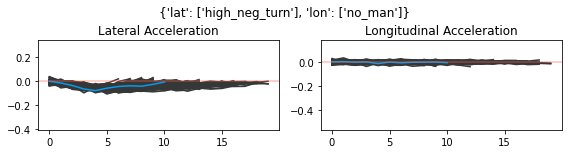

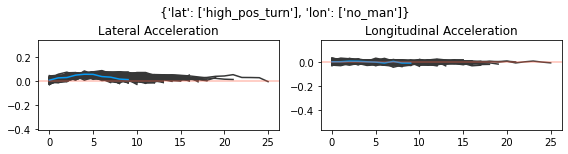

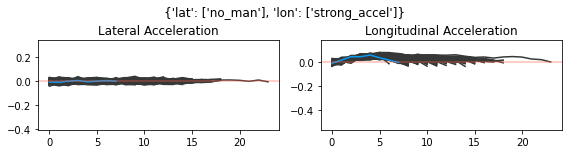

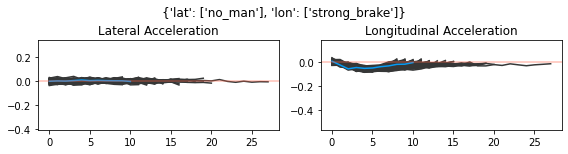

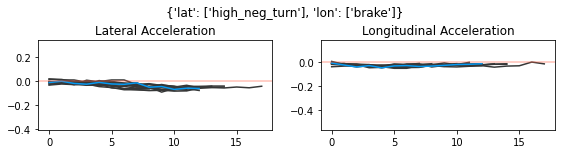

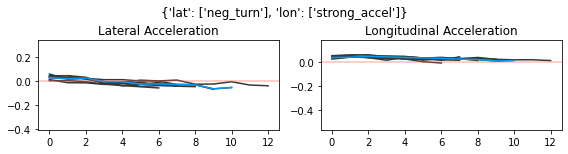

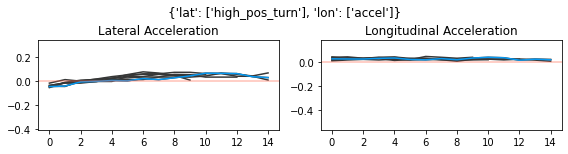

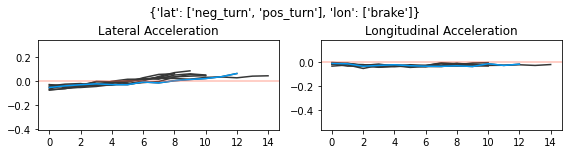

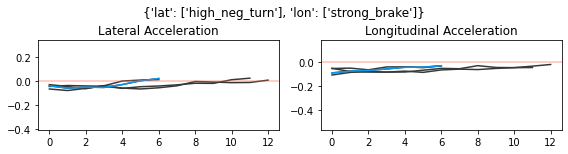

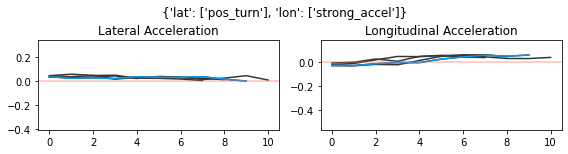

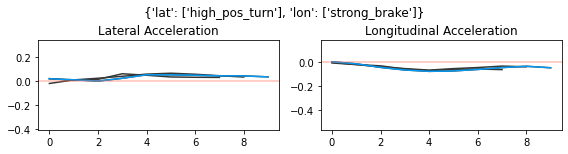

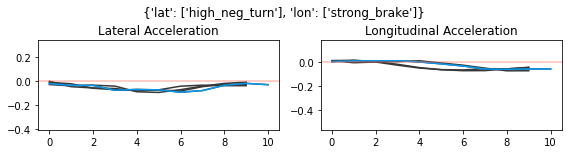

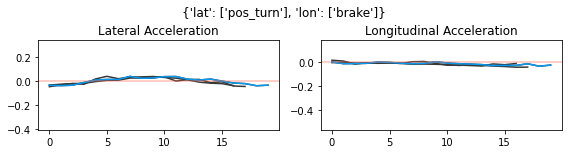

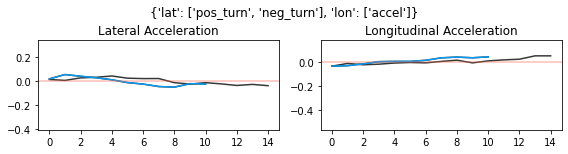

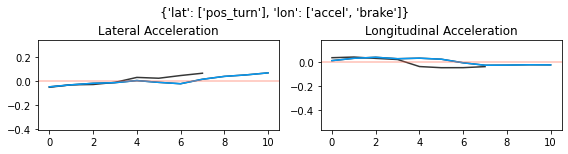

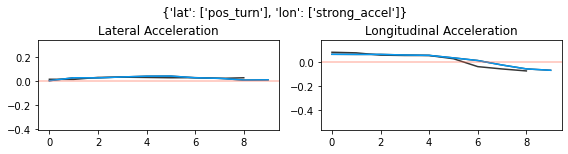

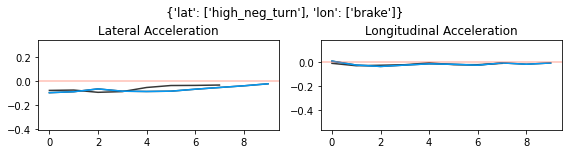

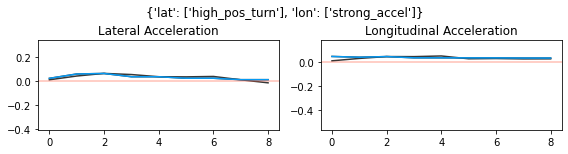

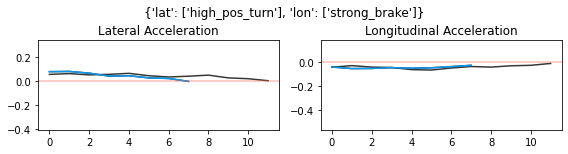

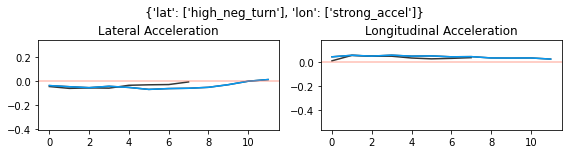

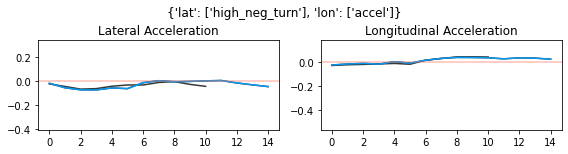

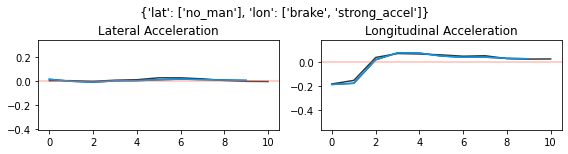

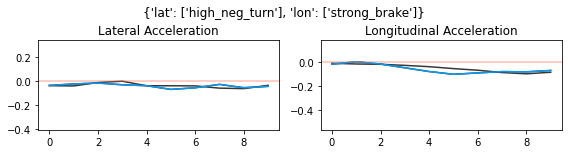

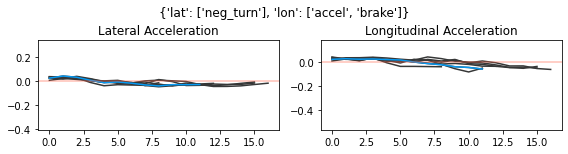

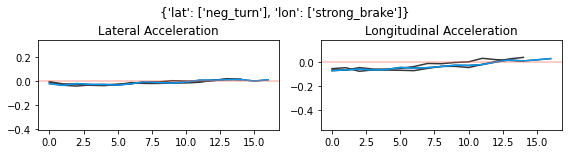

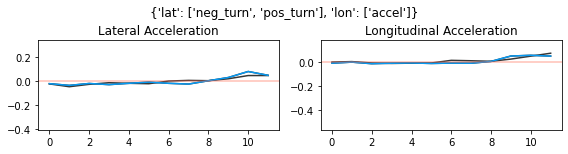

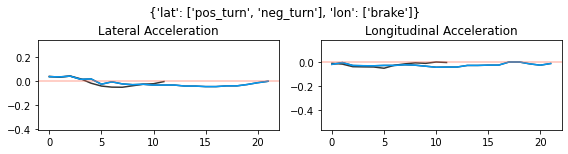

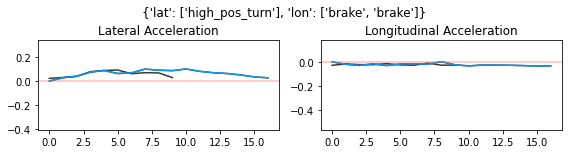

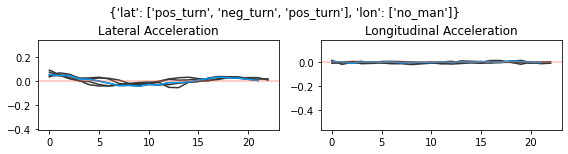

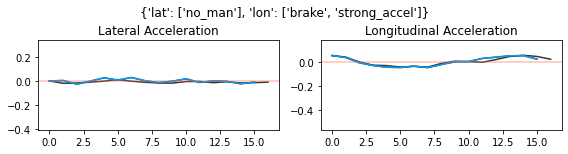

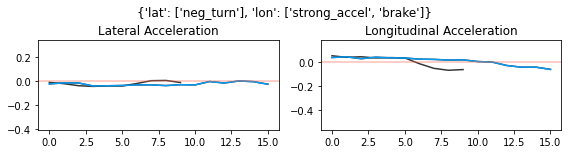

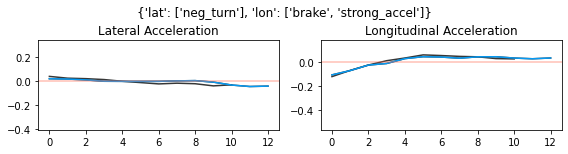

In [9]:
for motif in pruned_motif_list:
    uah_viz.plot_motif_members(motif, trip_list, lon_index, lat_index, True)
    plt.tight_layout()
    plt.show()